# Regressão linear simples

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
https://sites.icmc.usp.br/francisco <br>
Copyright: Creative Commons

<hr>

Vamos supor que temos o conjunto de dados abaixo.

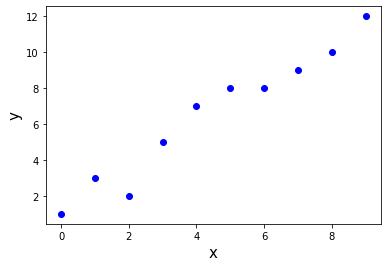

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

# define os dados
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 
plt.plot(x, y, 'bo')
plt.xlabel("x", fontsize = 15)
plt.ylabel("y", fontsize = 15)
plt.show(True)  

Vemos que é uma relação entre as variáveis $X$ e $Y$. Queremos determinar um modelo que melhor descreva essa relação. Podemos supor um modelo de regressão linear simples, como:
$$
y_i \approx \beta_0 + \beta_1x_i
$$

Como há outros fatores, além de $x_i$ que afetam os valores de $y_i$, podemos escrever:
$$
y_i = \beta_0 + \beta_1 x_i + \epsilon_i,
$$
onde $\epsilon_i$ é uma variável aleatória que indica o erro na aproximação. O objetivo dos métodos de regressão é encontrar o melhor valor de $\beta_0$ e $\beta_1$ que minimizem o erro no ajuste. Ou seja, queremos encontrar a linha no plano $x-y$ que melhor se ajuste aos dados observados.

Estimando os coeficiente através do método dos momentos ou dos mínimos quadrados, obtemos:
    $$
    \begin{cases}
    \hat{\beta}_1=\frac{\sum_{i=1}^n (x_i- \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} = \frac{S{xy}}{S{xx}}\\
    \hat{\beta}_0= \bar{y}-\hat{\beta_1}\bar{x}
    \end{cases}
    $$

Vamos implementar uma função para realizar a estimação.

In [3]:
from statistics import variance 
import math 

def estimate_coef(x, y): 
    # número de observações/pontos
    n = np.size(x) 
  
    # médias de x e y
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calcula os coeficientes de regressão
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

# função para mostrar os dados e o ajuste linear
def plot_regression_line(x, y, b): 
    # mostra os dados
    plt.scatter(x, y, color = "b", marker = "o", s = 50) 
  
    # prediz os valores
    y_pred = b[0] + b[1]*x 
  
    # mostra a reta de regressão
    plt.plot(x, y_pred, color = "r") 
  
    plt.xlabel('x', fontsize = 15) 
    plt.ylabel('y', fontsize = 15) 
    plt.show(True) 

Assim, aplicando ao conjunto de dados:

Estimated coefficients:
b_0 = 1.2363636363636363  
b_1 = 1.1696969696969697


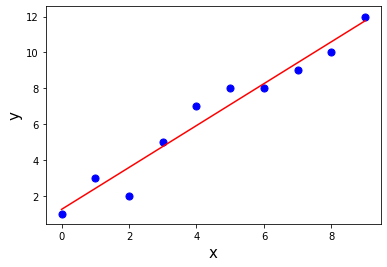

In [4]:
import numpy as np

# estima os coeficientes
b = estimate_coef(x, y) 
print("Estimated coefficients:\nb_0 = {}  \nb_1 = {}".format(b[0], b[1])) 
  
# mostra o ajuste linear
plot_regression_line(x, y, b) 

Para quantificar a acurácia do modelo, usamos o erro padrão residual (residual standard error):
$$
RSE = \sqrt{\frac{1}{n-2}\sum_{i=1}^n (y_i-\hat{y}_i)^2}
$$

In [5]:
#funcao que calcula o RSE
def RSE(x,y,b):
    n = len(y)
    RSE = 0
    for i in range(0,n):
        y_pred = b[0]+ x[i]*b[1] # valor predito
        RSE = RSE + (y[i]-y_pred)**2
    RSE = math.sqrt(RSE/(n-2))
    return RSE
print('RSE:', RSE(x,y,b))

RSE: 0.8384690232980003


Outra medida importante é o coeficiente R2, que mede a proporção da variabilidade em Y que pode ser explicada a partir de X.
$$
R^2 = 1-\frac{\sum_{i=1}^n (y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}, \quad 0\leq R^2\leq 1
$$

In [6]:
def R2(x,y,b):
    n = len(y)
    c1 = 0
    c2 = 0
    ym = np.mean(y)
    for i in range(0,n):
        y_pred = b[0]+ x[i]*b[1] # valor predito
        c1 = c1 + (y[i]-y_pred)**2
        c2 = c2 + (y[i]-ym)**2
    R2 = 1 - c1/c2
    return R2

print('R2:', R2(x,y,b))

R2: 0.952538038613988


Quanto mais próximo de um, melhor é o ajuste da regressão linear.

O código completo:

Coeficientes:
b_0 = 1.2363636363636363  
b_1 = 1.1696969696969697
R2: 0.952538038613988


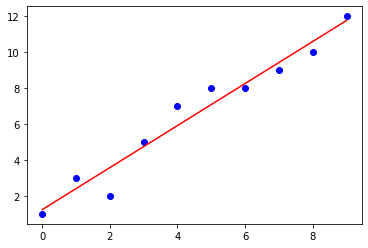

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from statistics import variance 
import math 

# define os dados
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 

# funcao que estima os coeficientes
def estimate_coef(x, y): 
    # número de observações
    n = np.size(x) 
    # estimadores
    m_x, m_y = np.mean(x), np.mean(y) 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
    # calcula os coeficientes de regressão
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
    return(b_0, b_1) 

# função para mostrar os dados e o ajuste linear
def plot_regression_line(x, y, b): 
    # mostra os dados
    plt.scatter(x, y, color = "b", marker = "o", s = 50) 
    # prediz os valores
    y_pred = b[0] + b[1]*x 
    # mostra a reta de regressão
    plt.plot(x, y_pred, color = "r") 
    plt.xlabel('x', fontsize = 15) 
    plt.ylabel('y', fontsize = 15) 
    plt.show(True) 
    
def R2(x,y,b):
    n = len(y)
    c1 = 0
    c2 = 0
    ym = np.mean(y)
    for i in range(0,n):
        y_pred = b[0]+ x[i]*b[1] # valor predito
        c1 = c1 + (y[i]-y_pred)**2
        c2 = c2 + (y[i]-ym)**2
    R2 = 1 - c1/c2
    return R2
    
# estima os coeficientes
b = estimate_coef(x, y) 
print("Coeficientes:\nb_0 = {}  \nb_1 = {}".format(b[0], b[1])) 
print('R2:', R2(x,y,b))


# mostra o ajuste linear
plt.plot(x,y,'bo')
plt.plot(x, b[0] + b[1]*x, 'r-')
plt.savefig('plot.eps')